# Invoke Bedrock model for code generation

> *This notebook should work well with the **`Data Science 3.0`** kernel in SageMaker Studio*

## Introduction

In this notebook we show you how to use a LLM to generate code based on the text prompt.

We will use Bedrock's Claude v3 using the Boto3 API. 

The prompt used in this example is called a zero-shot prompt because we are not providing any examples of text other than the prompt.

**Note:** *This notebook can be run within or outside of AWS environment.*

#### Context
To demonstrate the code generation capability of Amazon Bedrock, we will explore the use of Boto3 client to communicate with Amazon Bedrock API. We will demonstrate different configurations available as well as how simple input can lead to desired outputs.

#### Pattern
We will simply provide the Amazon Bedrock API with an input consisting of a task, an instruction and an input for the model under the hood to generate an output without providing any additional example. The purpose here is to demonstrate how the powerful LLMs easily understand the task at hand and generate compelling outputs.

![](./images/bedrock-code-gen.png)

#### Use case
To demonstrate the generation capability of models in Amazon Bedrock, let's take the use case of code generation.

#### Persona

You are Moe, a Data Analyst, at AnyCompany. The company wants to understand its sales performance for different products for different products over the past year. You have been provided a dataset named sales.csv. The dataset contains the following columns:

- Date (YYYY-MM-DD) format
- Product_ID (unique identifer for each product)
- Price (price at which each product was sold)

#### Implementation
To fulfill this use case, in this notebook we will show how to generate code for a given prompt. We will use the Anthropic Claude v3 using the Amazon Bedrock API with Boto3 client. 

In [1]:
import json
import os
import sys

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))
bedrock_client = boto3.client('bedrock-runtime',region_name=os.environ.get("AWS_DEFAULT_REGION", None))


## Code Generation

Following on the use case explained above, let's prepare an input for  the Amazon Bedrock service to generate python program for our use-case.

#### Lab setup - create sample sales.csv data for this lab.



In [2]:
# create sales.csv file
import csv

data = [
    ["date", "product_id", "price", "units_sold"],
    ["2023-01-01", "P001", 50, 20],
    ["2023-01-02", "P002", 60, 15],
    ["2023-01-03", "P001", 50, 18],
    ["2023-01-04", "P003", 70, 30],
    ["2023-01-05", "P001", 50, 25],
    ["2023-01-06", "P002", 60, 22],
    ["2023-01-07", "P003", 70, 24],
    ["2023-01-08", "P001", 50, 28],
    ["2023-01-09", "P002", 60, 17],
    ["2023-01-10", "P003", 70, 29],
    ["2023-02-11", "P001", 50, 23],
    ["2023-02-12", "P002", 60, 19],
    ["2023-02-13", "P001", 50, 21],
    ["2023-02-14", "P003", 70, 31],
    ["2023-03-15", "P001", 50, 26],
    ["2023-03-16", "P002", 60, 20],
    ["2023-03-17", "P003", 70, 33],
    ["2023-04-18", "P001", 50, 27],
    ["2023-04-19", "P002", 60, 18],
    ["2023-04-20", "P003", 70, 32],
    ["2023-04-21", "P001", 50, 22],
    ["2023-04-22", "P002", 60, 16],
    ["2023-04-23", "P003", 70, 34],
    ["2023-05-24", "P001", 50, 24],
    ["2023-05-25", "P002", 60, 21]
]

# Write data to sales.csv
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("sales.csv has been created!")

sales.csv has been created!


#### Analyzing sales with Amazon Bedrock generated Python program

In [3]:
# Create the prompt
# Analyzing sales

prompt_data = """

Human: You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Create a python program to analyze the sales data from a CSV file. The program should be able to read the data, and determine below:

- Total revenue for the year
- The product with the highest revenue
- The date with the highest revenue
- Visualize monthly sales using a bar chart

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.

Assistant:
"""

### Let's start by using the Anthropic Claude V3 Sonnet model.

In [4]:
messages=[{ "role":'user', "content":[{'type':'text','text': prompt_data}]}]

body=json.dumps(
        {
            "anthropic_version": "bedrock-2023-05-31",
            "max_tokens": 4096,
            "messages": messages,
            "temperature": 0.5,
            "top_p": 0.5,
            "stop_sequences": ["\n\nHuman:"],
            "top_k":250
        }  
    )  
    

#### Invoke the Anthropic Claude v3 model

In [5]:
modelId = "anthropic.claude-3-sonnet-20240229-v1:0"
response = bedrock_client.invoke_model(body=body, modelId=modelId)
response_body = json.loads(response.get('body').read())
#print(response_body)
output_list = response_body.get("content", [])
for output in output_list:
    print(output["text"])

import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Read data from CSV file
data = []
with open('sales.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Calculate total revenue for the year
total_revenue = sum(float(row['price']) * int(row['units_sold']) for row in data)

# Find the product with the highest revenue
product_revenue = defaultdict(float)
for row in data:
    product_revenue[row['product_id']] += float(row['price']) * int(row['units_sold'])
highest_revenue_product = max(product_revenue.items(), key=lambda x: x[1])[0]

# Find the date with the highest revenue
date_revenue = defaultdict(float)
for row in data:
    date_revenue[row['date']] += float(row['price']) * int(row['units_sold'])
highest_revenue_date = max(date_revenue.items(), key=lambda x: x[1])[0]

# Visualize monthly sales
monthly_sales = defaultdict(float)
for row in data:
    month = row['date'].split('-')[1]
    monthly_sales[m

#### (Optional) Execute the Bedrock generated code for validation. Go to text editor to copy the generated code as printed output can be trucncated. Replace the code in below cell.

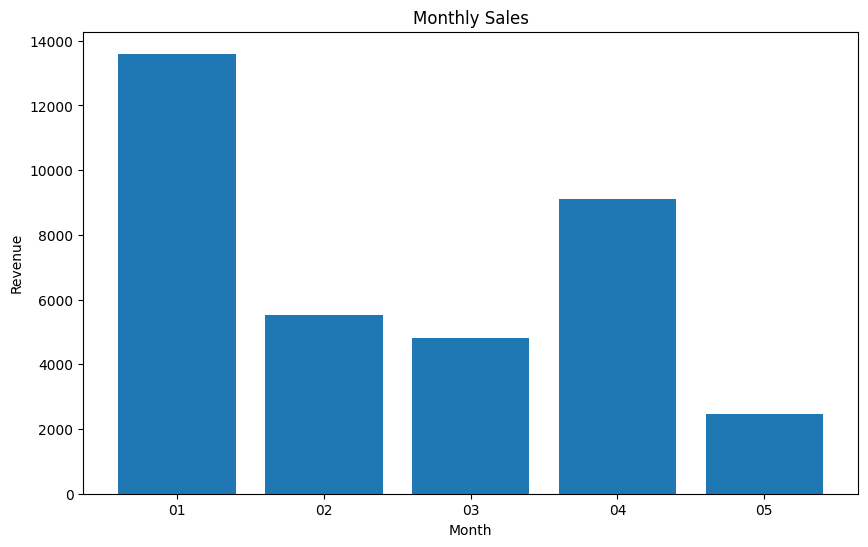

Total revenue for the year: $35490.00
Product with the highest revenue: P003
Date with the highest revenue: 2023-04-23


In [7]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

# Read data from CSV file
data = []
with open('sales.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(row)

# Calculate total revenue for the year
total_revenue = sum(float(row['price']) * int(row['units_sold']) for row in data)

# Find the product with the highest revenue
product_revenue = defaultdict(float)
for row in data:
    product_revenue[row['product_id']] += float(row['price']) * int(row['units_sold'])
highest_revenue_product = max(product_revenue.items(), key=lambda x: x[1])[0]

# Find the date with the highest revenue
date_revenue = defaultdict(float)
for row in data:
    date_revenue[row['date']] += float(row['price']) * int(row['units_sold'])
highest_revenue_date = max(date_revenue.items(), key=lambda x: x[1])[0]

# Visualize monthly sales
monthly_sales = defaultdict(float)
for row in data:
    month = row['date'].split('-')[1]
    monthly_sales[month] += float(row['price']) * int(row['units_sold'])

months = sorted(monthly_sales.keys())
sales = [monthly_sales[month] for month in months]

plt.figure(figsize=(10, 6))
plt.bar(months, sales)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales')
plt.show()

print(f"Total revenue for the year: ${total_revenue:.2f}")
print(f"Product with the highest revenue: {highest_revenue_product}")
print(f"Date with the highest revenue: {highest_revenue_date}")


## Conclusion
You have now experimented with using `boto3` SDK which provides a vanilla exposure to Amazon Bedrock API. Using this API you generate a python program to analyze and visualize given sales data.

### Take aways
- Adapt this notebook to experiment with different models available through Amazon Bedrock such as Amazon Titan and AI21 Labs Jurassic models.


## Thank You